In [12]:
import cv2, os
import numpy as np
from sklearn.model_selection import train_test_split
from ThresholdModel import ThresholdModel
import random

In [13]:
images_path = os.path.join(os.getcwd(), '/home/trdoan20/dev/cpp/CV/ImageSets/')
annotations_path = os.path.join(os.getcwd(), '/home/trdoan20/dev/cpp/CV/SegmentationClass/')

images_name = os.listdir(images_path)
annotations_name = os.listdir(annotations_path)

images_name_train, images_name_test, annotations_name_train, annotations_name_test = train_test_split(images_name, annotations_name, train_size=0.8)

In [14]:
model = ThresholdModel(images_path, annotations_path)
model.add_label('DiaChua', [255, 221, 51])
model.add_label('VungVoKhuan', [102, 255, 102])
model.add_label('GiayKhangSinh', [240, 120, 240])

model.fit(images_name_train, annotations_name_train)
# model.threshold

DiaChua [22.7968618945606, 27.00012325003111, 30.4025041590984] [95.40797414641827, 107.21891761444282, 113.9232710435193]
VungVoKhuan [24.131952583441212, 30.147720464747977, 35.32393973437919] [94.91395978600434, 107.57757987771626, 113.47897403459257]
GiayKhangSinh [24.204415067177663, 31.199407047938216, 35.42304359809183] [98.18177483756975, 110.56069667198764, 116.39018049586835]


In [15]:
images_test = []
annotations_test = []
    
for image_name in images_name_test:
    images_test.append(cv2.imread(os.path.join(images_path, image_name)))

for annotation_name in annotations_name_test:
    annotations_test.append(cv2.imread(os.path.join(annotations_path, annotation_name)))

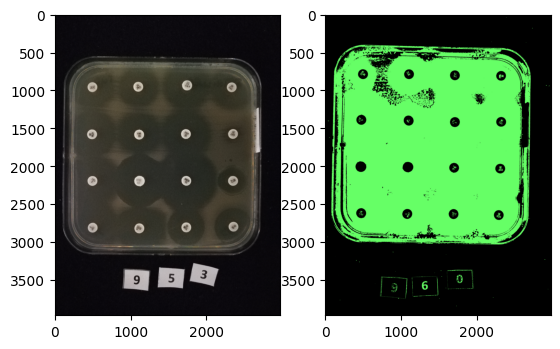

In [18]:
import matplotlib.pyplot as plt

mask = model.predict(images_test[2], 'VungVoKhuan')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(images_test[0], cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))